# IMT 547 Project Part III: Preliminary Analysis

Chesie Yu

02/19/2024

<style type = "text/css">  
    body {
        font-family: "Serif"; 
        font-size: 12pt;
    }
    em {
        color: #4E7F9E;
    }
    strong {
        color: #436D87;
    }
    li {
        color: #4E7F9E;
    }
    ul {
        color: #4E7F9E;
    }
    img {
        display: block;
        margin: auto;
    } 
    .jp-RenderedHTMLCommon a:link { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon a:visited { 
        color: #94C1C9;
    }
    .jp-RenderedHTMLCommon code {
        color: #4E7F9E;
    }  
    .mark {
        color: #B00D00;
        background-color: #FFF7B1;
    }
</style>

_This notebook outlines the **preliminary analysis** process (partially) for the **YouTube Gaming Comment Toxicity** project._    

**Components**  
1. **Summary Statistics**: Basic summary statistics for the dataset.  
2. **Visualizations & EDA**: Visualizations on distribution of toxicity, sentiment, engagement metrics, and word frequency.  

**Functions**   
- **`generate_wordcloud(text, image_path="../asset/image/yt.png", min_font_size=30, max_font_size=135, max_words=250)`**: Generate and display a word cloud for a given text.   

In [1]:
# Import the libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Configuration and setup
warnings.filterwarnings("ignore", category = FutureWarning)

## 0. Load the Data

In [2]:
# Unzip the data file
import zipfile
with zipfile.ZipFile("../data/yt_labeled.zip", "r") as zip_ref:
    zip_ref.extractall("../data")

In [3]:
# Load the data
yt = pd.read_csv("../data/yt_labeled.csv")
yt.head(3)

,channel_id,channel_name,video_id,video_title,video_creation_time,video_description,video_tags,video_viewcount,video_likecount,video_commentcount,...,profanity,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,"['pewdiepie', 'pewds', 'pewdie']",11540558.0,473052.0,15129.0,...,0.600193,0.138155,0.315,0.572,0.113,-0.6395,0.400000,0.400000,0.066667,0.0
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,"['pewdiepie', 'pewds', 'pewdie']",11540558.0,473052.0,15129.0,...,0.038906,0.009515,0.000,0.703,0.297,0.5859,0.345238,0.345238,0.000000,0.1
2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,🌏 Get exclusive NordVPN deal here ➵ https://N...,"['pewdiepie', 'pewds', 'pewdie']",11540558.0,473052.0,15129.0,...,0.098687,0.106963,0.124,0.442,0.434,0.7906,0.583333,0.583333,0.071429,0.0


In [4]:
# Check the dimensions
print(f"Number of rows: {yt.shape[0]}\n"
      f"Number of columns: {yt.shape[1]}\n")

# Check for missing values
print(f"Number of missing values: {yt.isna().sum().sum()}")

Number of rows: 138996
Number of columns: 33

Number of missing values: 0


### Summary Statistics

In [5]:
# Check the time range
yt["video_creation_time"].min(), yt["video_creation_time"].max()

('2011-04-22 01:05:52+00:00', '2024-02-19 20:15:00+00:00')

In [6]:
# Number of unique channels
print(f"Number of unique channels: {yt['channel_id'].nunique()}")

Number of unique channels: 33


In [7]:
# Number of unique videos
print(f"Number of unique videos: {yt['video_id'].nunique()}")

Number of unique videos: 1420


In [8]:
# Print the summary statistics
yt.describe()

,video_viewcount,video_likecount,video_commentcount,comment_likecount,comment_replycount,toxicity,severe_toxicity,identity_attack,insult,profanity,threat,neg,neu,pos,compound,polarity,subjectivity,negative_emotion,positive_emotion
count,1.389960e+05,1.389960e+05,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000,138996.000000
mean,3.742645e+06,1.213770e+05,7021.169537,231.204279,4.082261,0.132850,0.012879,0.018501,0.052286,0.076708,0.034556,0.083286,0.614415,0.302301,0.261851,0.387200,0.387200,0.022049,0.047938
std,6.016032e+06,1.691242e+05,11585.725874,1917.918916,26.140869,0.140907,0.040842,0.035805,0.086116,0.111845,0.082025,0.158903,0.276712,0.275902,0.433541,0.330210,0.330210,0.069295,0.117310
min,1.158900e+04,1.580000e+02,15.000000,0.000000,0.000000,0.002749,0.000256,0.000342,0.005765,0.009392,0.005360,0.000000,0.000000,0.000000,-0.998900,0.000000,0.000000,0.000000,0.000000
25%,6.938660e+05,1.930000e+04,860.000000,0.000000,0.000000,0.035220,0.002384,0.006031,0.013061,0.022492,0.008712,0.000000,0.408000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.915267e+06,5.584000e+04,2594.000000,2.000000,0.000000,0.077668,0.003929,0.009064,0.020450,0.033145,0.010369,0.000000,0.588000,0.291000,0.318200,0.400000,0.400000,0.000000,0.000000
75%,4.368518e+06,1.439280e+05,8442.000000,17.000000,1.000000,0.182691,0.008469,0.015858,0.045008,0.080965,0.014048,0.121000,0.866000,0.512000,0.636900,0.602273,0.602273,0.000000,0.000000
max,1.086792e+08,1.586707e+06,151333.000000,324721.000000,750.000000,0.968226,0.655276,0.774291,0.868575,0.958766,0.765099,1.000000,1.000000,1.000000,0.999800,1.000000,1.000000,1.000000,1.000000


## 1. Toxicity Score Distribution

In [9]:
# Average toxicity
toxicity_cols = ["toxicity", "severe_toxicity", "identity_attack", "insult", "profanity", "threat"]
yt[toxicity_cols].mean()

toxicity           0.132850
severe_toxicity    0.012879
identity_attack    0.018501
insult             0.052286
profanity          0.076708
threat             0.034556
dtype: float64

In [10]:
# Define the threshold alpha
alpha = 0.3

# Create binary labels for toxicity
for col in toxicity_cols:
    yt[f"is_{col}"] = yt[col] > alpha          

In [11]:
# Number of columns exhibiting toxicity
is_toxicity_cols = ["is_toxicity", "is_severe_toxicity", 
                 "is_identity_attack", "is_insult", 
                 "is_profanity", "is_threat"]
yt[is_toxicity_cols].sum()

is_toxicity           17206
is_severe_toxicity     1040
is_identity_attack      437
is_insult              4748
is_profanity           5693
is_threat              4639
dtype: int64

In [12]:
# Proportion of toxic comments
yt[is_toxicity_cols].sum() / yt.shape[0]

is_toxicity           0.123788
is_severe_toxicity    0.007482
is_identity_attack    0.003144
is_insult             0.034159
is_profanity          0.040958
is_threat             0.033375
dtype: float64

### Toxicity Distribution

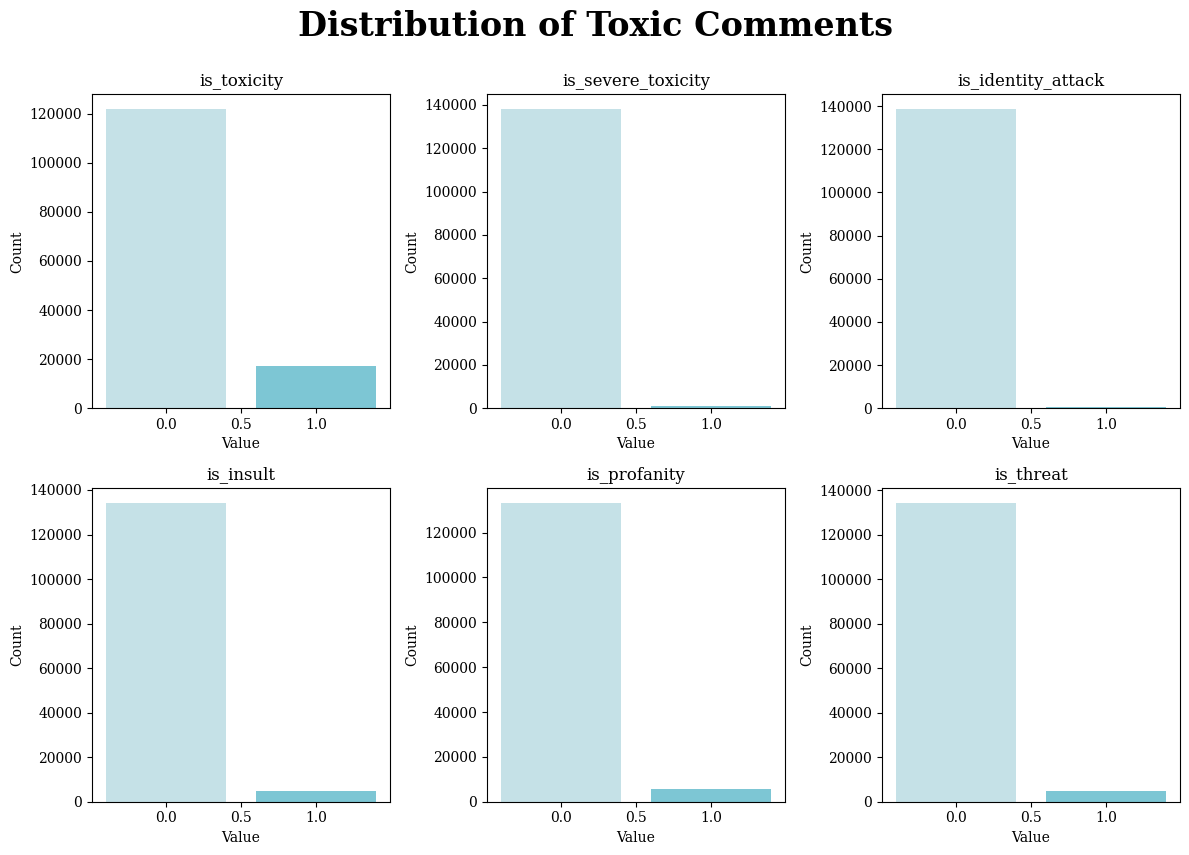

In [13]:
# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Visualize the class distribution for each column
for i, col in enumerate(is_toxicity_cols):
    counts = yt[col].value_counts()
    axes[i // 3, i % 3].bar(counts.index, counts.values, color = ["#C5E1E7", "#7DC6D4"])
    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_xlabel("Value")
    axes[i // 3, i % 3].set_ylabel("Count")

# Display the plot
fig.suptitle("Distribution of Toxic Comments", 
             size = 24, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/01a-toxicity-distribution.png", dpi=300, transparent=True)
plt.show()

### Action vs Non-Action

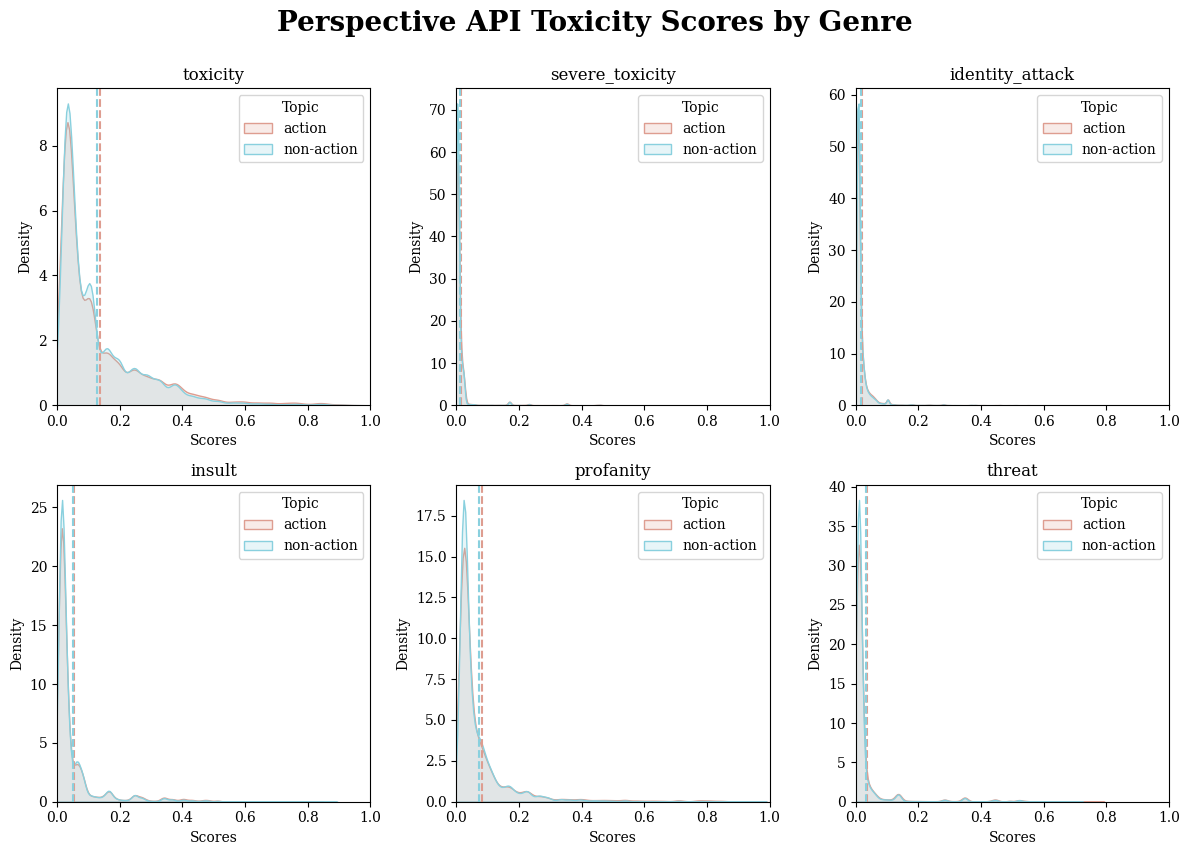

In [14]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by channel
for i, col in enumerate(toxicity_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i // 3, i % 3], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i // 3, i % 3].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i // 3, i % 3].set_title(col)
    axes[i // 3, i % 3].set_xlabel("Scores")
    axes[i // 3, i % 3].set_ylabel("Density")
    axes[i // 3, i % 3].set_xlim(0, 1)
    axes[i // 3, i % 3].legend(title = "Topic")

# Display the plot
fig.suptitle("Perspective API Toxicity Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/01b-toxicity-by-genre.png", dpi=300, transparent=True)
plt.show()

### Hypothesis Testing 

In [15]:
# Define the samples
s1 = yt[yt["genre"] == "non-action"]["toxicity"]
s2 = yt[yt["genre"] == "action"]["toxicity"]

# Significance level
alpha = 0.05

In [16]:
# Perform KS test to assess if the sample distributions are approximately normal
# Alternatives: Anderson-Darling, Shapiro-Wilk (better for smaller samples)
# KS test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
for s in (s1, s2): 
    d, p = stats.kstest(s, "norm")
    print(f"KS test statistic: {d:.4f}")
    print(f"p-value: {p:.4f}")

    # Interpret the result
    if p > alpha:
        print("Fail to reject H0: Sample distribution is approximately normal.")
    else:
        print("Reject H0: Sample distribution is not approximately normal.\n")

KS test statistic: 0.5016
p-value: 0.0000
Reject H0: Sample distribution is not approximately normal.

KS test statistic: 0.5018
p-value: 0.0000
Reject H0: Sample distribution is not approximately normal.



In [17]:
# Perform Levene test for equal variances
# Less sensitive to departures from normality
# Levene test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm
w, p = stats.levene(s1, s2)
print(f"Levene test statistic: {w:.4f}")
print(f"p-value: {p:.4f}")

# Interpret the result
if p > alpha:
    print("Fail to reject H0: The samples have equal variances.")
else:
    print("Reject H0: The samples do not have equal variances.\n")

Levene test statistic: 247.0085
p-value: 0.0000
Reject H0: The samples do not have equal variances.



In [18]:
# Perform KS test for equal distribution
# Nonparametric test that compares cumulative distributions of two unmatched groups
# Based on the largest discrepancy between distributions
# KS test: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35g.htm
d, p = stats.kstest(s1, s2)
print(f"KS test statistic: {d:.4f}")
print(f"p-value: {p:.4f}")

# Interpret the result
if p > alpha:
    print("Fail to reject H0: The samples come from the same distribution.")
else:
    print("Reject H0: The samples come from different distributions.\n")

KS test statistic: 0.0247
p-value: 0.0000
Reject H0: The samples come from different distributions.



In [19]:
# Perform K-S test for each column
for col in toxicity_cols:
    # Define the samples
    s1 = yt[yt["genre"] == "non-action"][col]
    s2 = yt[yt["genre"] == "action"][col]

    # Perform KS test for equal distribution
    d, p = stats.kstest(s1, s2)
    print(f"KS Test for {col}")
    print(f"KS test statistic: {d:.4f}")
    print(f"p-value: {p:.4f}")

    # Interpret the result
    if p > alpha:
        print(f"Fail to reject H0: The samples come from the same distribution.")
    else:
        print(f"Reject H0: The samples come from different distributions.\n")

KS Test for toxicity
KS test statistic: 0.0247
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for severe_toxicity
KS test statistic: 0.0299
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for identity_attack
KS test statistic: 0.0288
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for insult
KS test statistic: 0.0232
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for profanity
KS test statistic: 0.0196
p-value: 0.0000
Reject H0: The samples come from different distributions.

KS Test for threat
KS test statistic: 0.0217
p-value: 0.0000
Reject H0: The samples come from different distributions.



In [20]:
# # Perform Mann-Whitney U test for equal distribution
# # Nonparametric test that compares two unpaired groups
# # Based on discrepancy between the mean ranks of the two groups
# # KS test vs MWU test: https://www.graphpad.com/guides/prism/latest/statistics/stat_choosing_between_the_mann-whit.htm
# u, p = stats.mannwhitneyu(s1, s2)
# print(f"MWU-test statistic: {u:.4f}")
# print(f"p-value: {p:.4f}")

In [21]:
# # Perform two-sample two-sided t-test
# t, p = stats.ttest_ind(yt[yt["genre"] == "action"]["toxicity"], 
#                        yt[yt["genre"] == "non-action"]["toxicity"],
#                        alternative = "two-sided")
# print(f"t-test statistic: {t:.4f}")
# print(f"p-value: {p:.4f}")

In [22]:
# # Perform chi-square test
# # Is there a relationship between genre and is_toxicity? 
# contingency_table = pd.crosstab(yt["genre"], yt["is_toxicity"])
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-squared test statistic: {chi2:.4f}")
# print(f"p-value: {p:.4f}")

<br>

## 2. Sentiment Score Distribution

### VADER Sentiment

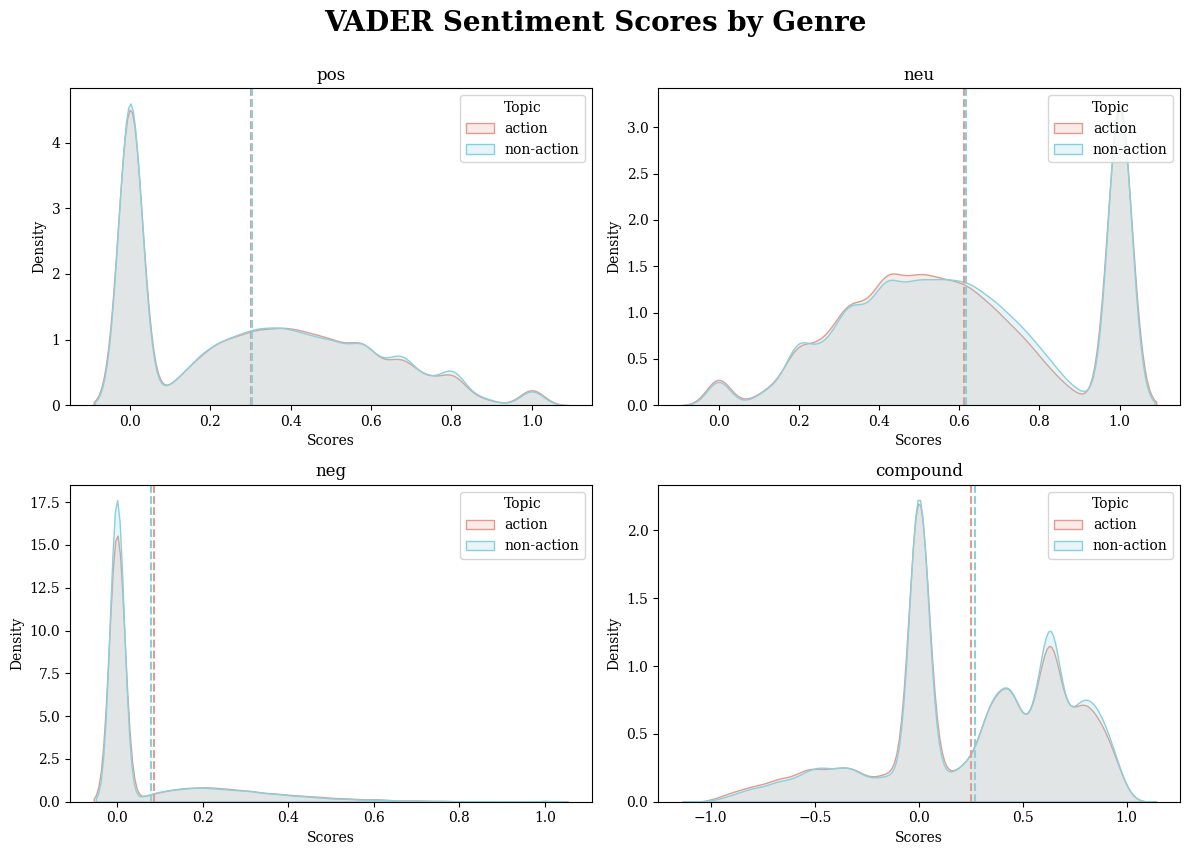

In [23]:
# Columns to plot
vader_cols = ["pos", "neu", "neg", "compound"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by channel
for i, col in enumerate(vader_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i // 2, i % 2], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i // 2, i % 2].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i // 2, i % 2].set_title(col)
    axes[i // 2, i % 2].set_xlabel("Scores")
    axes[i // 2, i % 2].set_ylabel("Density")
    axes[i // 2, i % 2].legend(title = "Topic")

# Display the plot
fig.suptitle("VADER Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02a-sentiment-vader-by-genre.png", dpi=300, transparent=True)
plt.show()

### TextBlob Sentiment

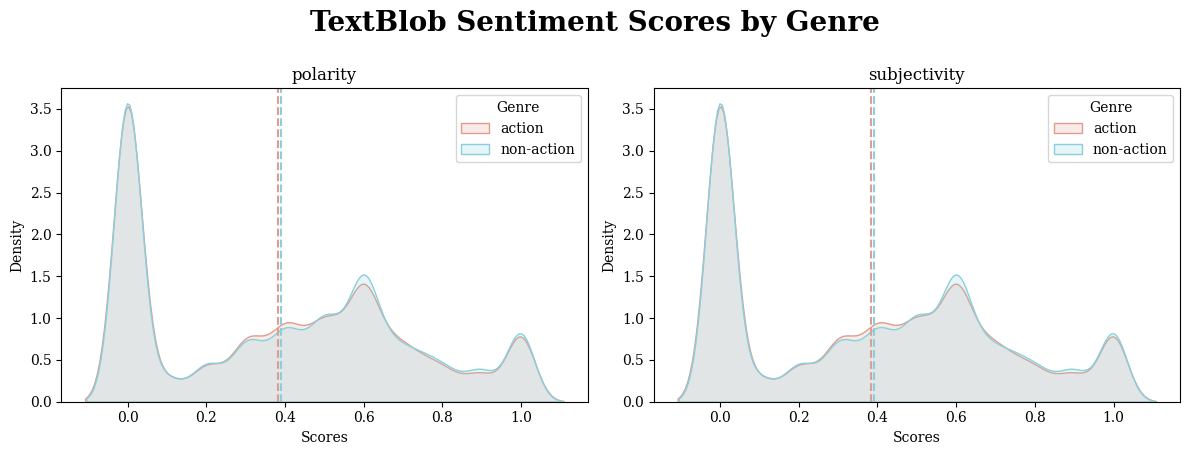

In [24]:
# Columns to plot
textblob_cols = ["polarity", "subjectivity"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(textblob_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("TextBlob Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02b-sentiment-textblob-by-genre.png", dpi=300, transparent=True)
plt.show()

### Empath Sentiment

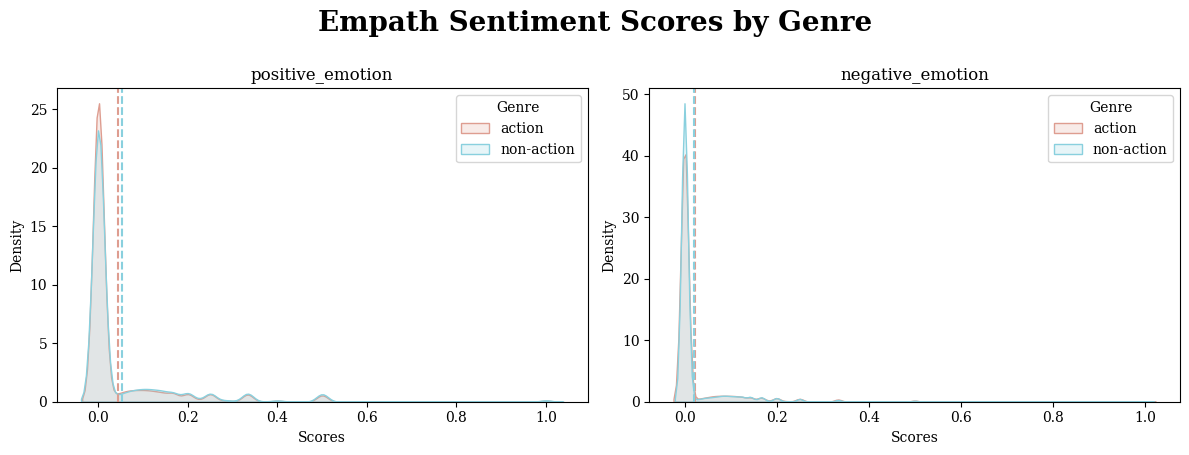

In [25]:
# Columns to plot
empath_cols = ["positive_emotion", "negative_emotion"]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(empath_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Scores")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Empath Sentiment Scores by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/02c-sentiment-empath-by-genre.png", dpi=300, transparent=True)
plt.show()

<br>

## 3. Engagement Metrics Distribution

### All Comments

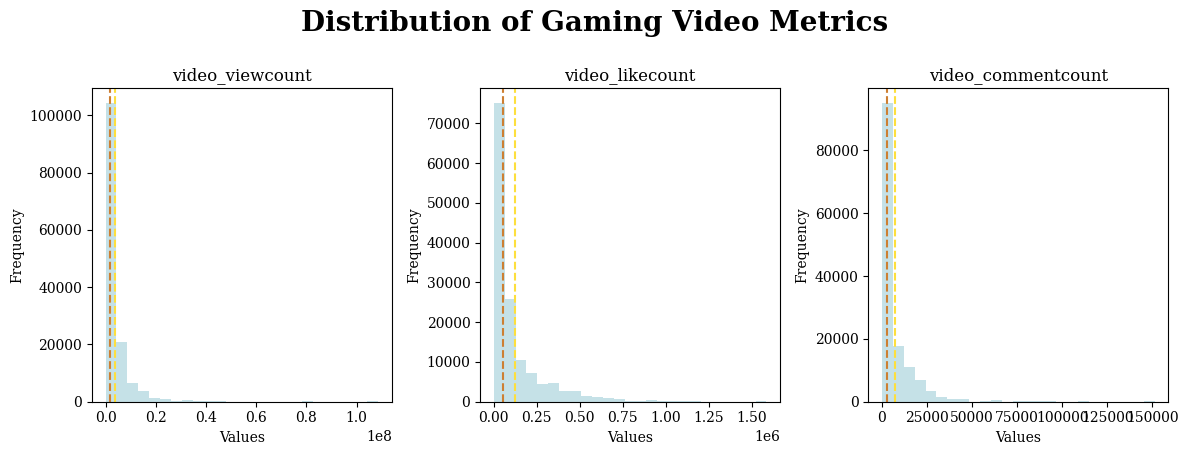

In [26]:
# Columns to plot
video_cols = ["video_viewcount", "video_likecount", "video_commentcount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Visualize the distribution of video metrics
for i, col in enumerate(video_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 25, color = "#C5E1E7")
    # Plot the average line
    axes[i].axvline(yt[col].mean(), color = "#FDDF3D", linestyle = "--")
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03a-metrics-video-distribution.png", dpi=300, transparent=True)
plt.show()

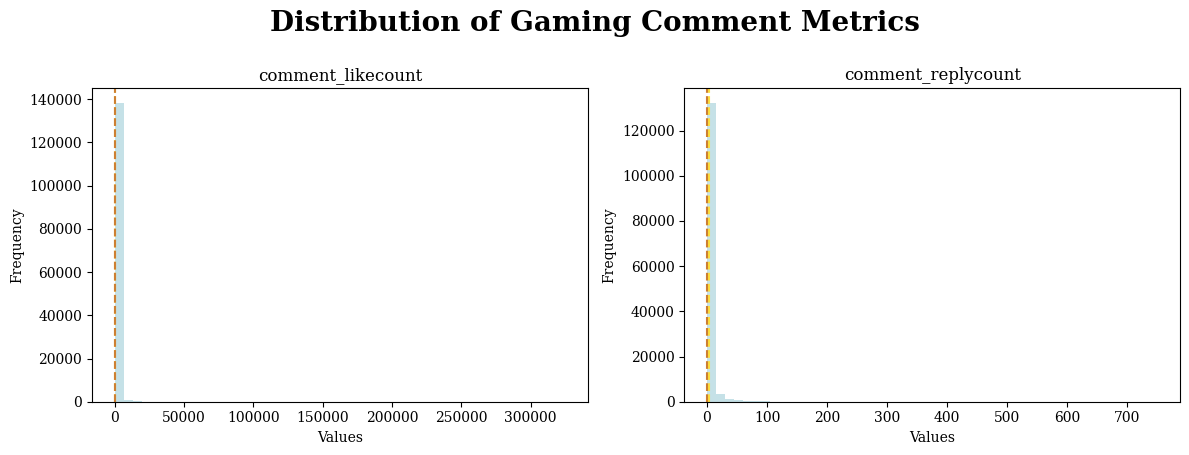

In [27]:
# Columns to plot
comment_cols = ["comment_likecount", "comment_replycount"]

# Set up the figure with subplots
plt.rcParams.update({"font.family": "serif"})
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Visualize the distribution of comment metrics
for i, col in enumerate(comment_cols):
    # Plot the histogram
    axes[i].hist(yt[col], bins = 50, color = "#C5E1E7")
    # Plot the average line
    axes[i].axvline(yt[col].mean(), color = "#FDDF3D", linestyle = "--")
    # Plot the median line
    axes[i].axvline(yt[col].median(), color = "#CD7F32", linestyle = "--")
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
    
# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03a-metrics-comment-distribution.png", dpi=300, transparent=True)
plt.show()

### Action vs Non-Action

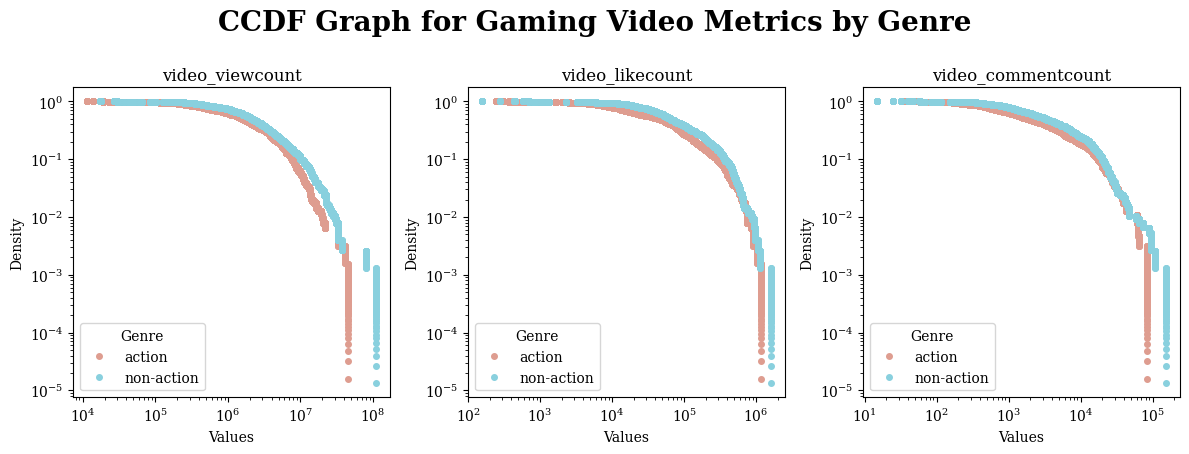

In [28]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03b-metrics-video-ccdf-by-genre.png", dpi=300, transparent=True)
plt.show()

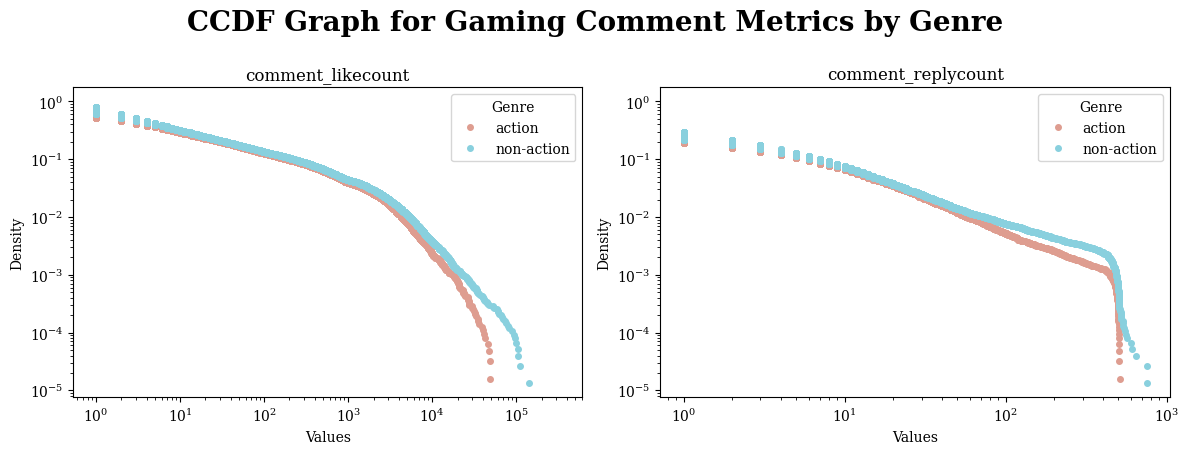

In [29]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the CCDFs by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("genre"):
        # Sort data
        sorted_data = np.sort(group[col])
        # Calculate CCDF
        ccdf = 1. - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        # Plot
        axes[i].loglog(sorted_data, ccdf, label=genre, color=colors[genre], marker='o', linestyle='', markersize=4)
       
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("CCDF Graph for Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03b-metrics-comment-ccdf-by-genre.png", dpi=300, transparent=True)
plt.show()

**Complementary Cumulative Distribution Function (CCDF)**: Gives the probability that a random variable $X$ takes on a value greater than $x$.  

$CCDF(x) = 1 - F(x) = P(X > x)$

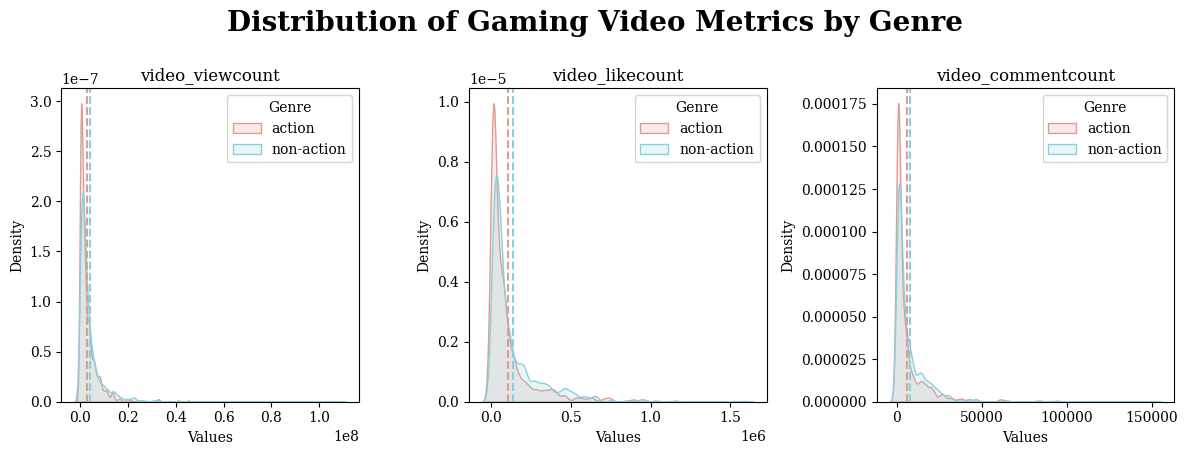

In [30]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(video_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Distribution of Gaming Video Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03c-metrics-video-distribution-by-genre.png", dpi=300, transparent=True)
plt.show()

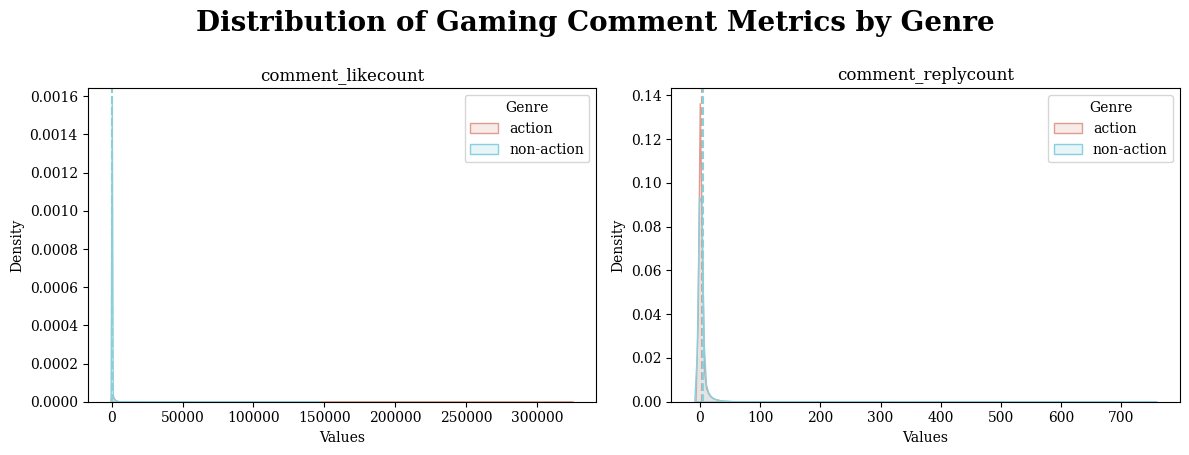

In [31]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4.5))

# Set the color scheme
colors = {"action": "#DE9D90", "non-action": "#89D0DE"}

# Visualize the distribution of data by genre
for i, col in enumerate(comment_cols):
    for genre, group in yt.groupby("genre"):
        # Plot the density plot
        sns.kdeplot(group[col], ax = axes[i], 
                    fill = True, color = colors[genre], alpha = 0.2,
                    label = genre)
        # Plot the average line
        axes[i].axvline(group[col].mean(), 
                        linestyle = "--", 
                        color = colors[genre])
    axes[i].set_title(col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
    axes[i].legend(title = "Genre")

# Display the plot
fig.suptitle("Distribution of Gaming Comment Metrics by Genre", 
             size = 20, weight = "bold", y = 1)
fig.tight_layout()
plt.savefig("../viz/03c-metrics-comment-distribution-by-genre.png", dpi=300, transparent=True)
plt.show()

<br>

## 4. Word Cloud

In [32]:
# Import the libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [33]:
# Concatenate the improvements text
all_comments = " ".join(yt["cleaned_comment"])
all_action_comments = "".join(yt["cleaned_comment"][yt["genre"] == "action"])
all_nonaction_comments = "".join(yt["cleaned_comment"][yt["genre"] == "non-action"])

In [34]:
def generate_wordcloud(text, image_path="../asset/image/yt.png", 
                       min_font_size=30, max_font_size=135,
                       max_words=250):
    """
    Generate and display a word cloud for a given text.  
    """

    # Create the mask
    mask = np.array(Image.open(image_path))

    # Grab the mask colors
    colors = ImageColorGenerator(mask)

    # Define the wordcloud
    cloud = WordCloud(mask = mask,
                      background_color = "white",
                      color_func = colors, 
                      font_path = "../asset/font/Montserrat-Medium.ttf",
                      min_font_size = min_font_size, 
                      max_font_size = max_font_size, 
                      max_words = max_words).generate(text)

    # Plot the wordcloud
    fig = plt.figure(figsize = (16,12))
    _ = plt.imshow(cloud)
    _ = plt.axis("off")
    return plt

### All Comments

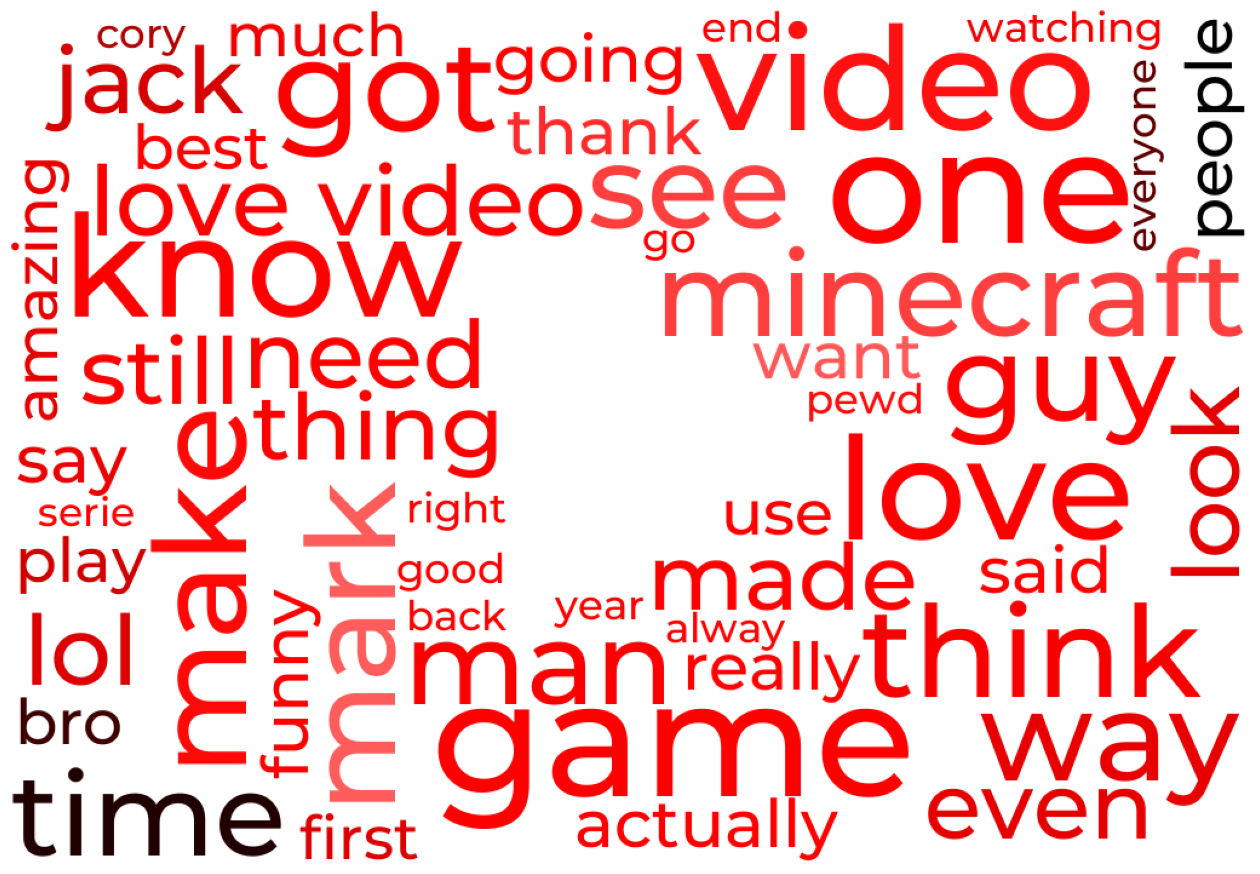

In [35]:
# Word Cloud for all comments
generate_wordcloud(all_comments)
plt.savefig(f"../viz/04a-wordcloud-all-comments.png", dpi=300, transparent=True)
plt.show()

In [36]:
# Set up the vectorizer and remove the stop words
vectorizer = CountVectorizer(stop_words = "english")

# Create the DTM
DTM = vectorizer.fit_transform([all_comments])

# Retrieve the feature names
vocabulary = vectorizer.get_feature_names_out()

# Sort the words by the number of occurrences
DTM_sorted = pd.Series(np.squeeze(DTM.toarray()), index = vocabulary)
DTM_sorted.sort_values(ascending = False, inplace = True)
DTM_sorted.head(10)

love         18037
like         13234
video         8733
videos        8642
game          7884
minecraft     6918
make          6550
good          5977
best          5576
time          5140
dtype: int64

### Action vs Non-Action

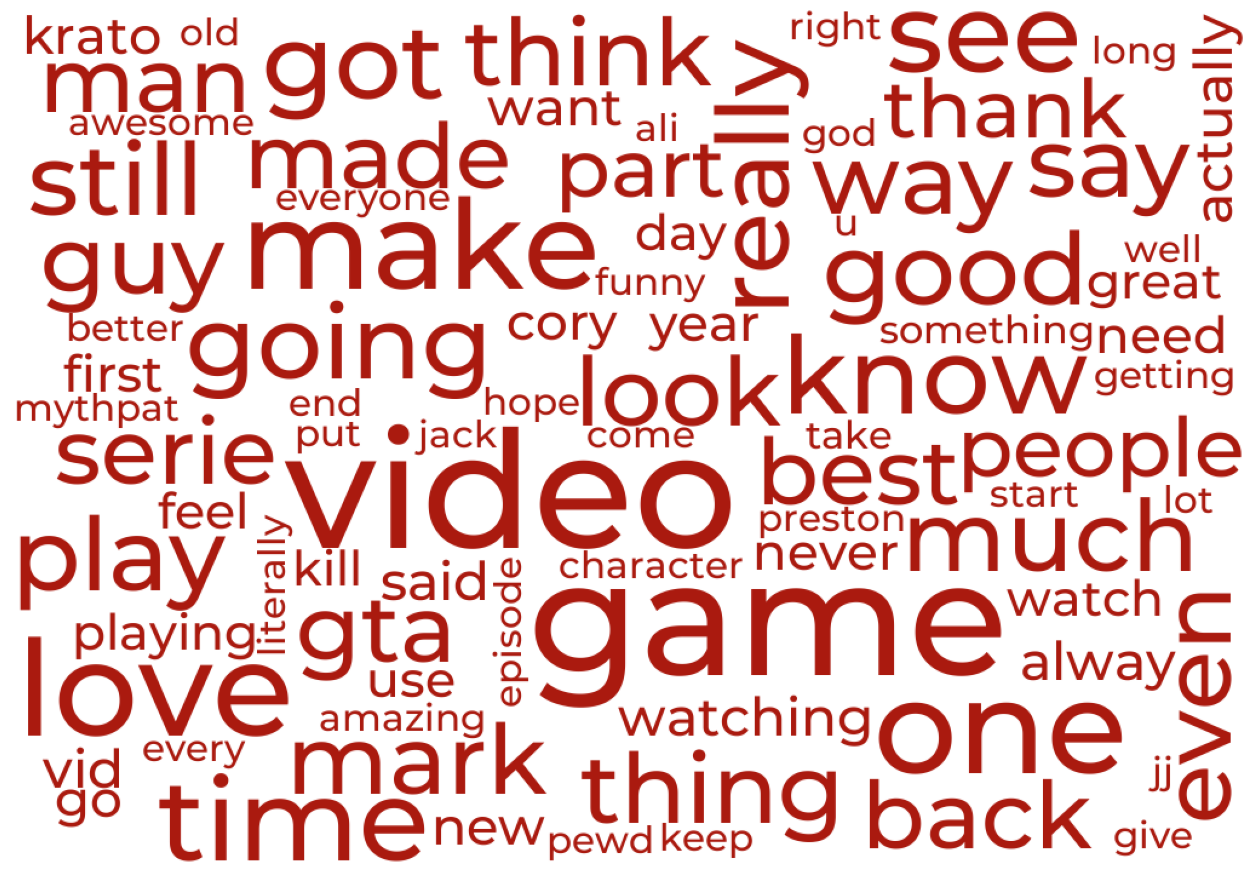

In [37]:
# Word Cloud for all action comments
generate_wordcloud(all_action_comments, "../asset/image/red.png")
plt.savefig(f"../viz/04b-wordcloud-action.png", dpi=300, transparent=True)
plt.show()

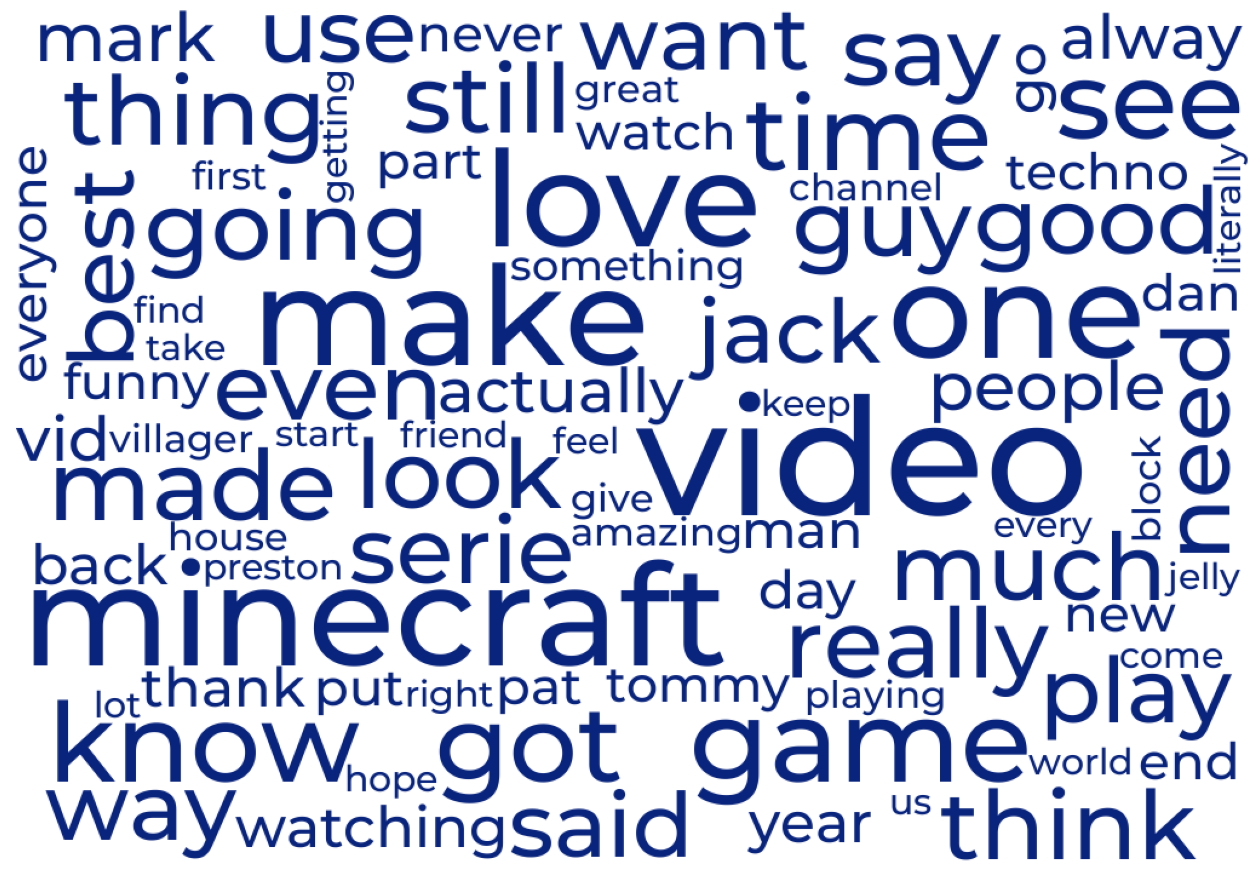

In [38]:
# Word Cloud for all non-action comments
generate_wordcloud(all_nonaction_comments, "../asset/image/blue.png")
plt.savefig(f"../viz/04c-wordcloud-nonaction.png", dpi=300, transparent=True)
plt.show()